<a href="https://colab.research.google.com/github/EXYNOS-999/corona_prophet/blob/master/Corona_EDA_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathematical Simulation of nCOV Transmission Model

---



---



We are also investigating the use of a  deterministic SIR metapopulation transmission model of infection within and between major Chinese cities to confirmed cases of 2019-nCoV in Chinese cities and cases.

reported in other countries; to study th epidemiological and population dynamics occurring
over the same time scale. (edited) 

We define and study an open stochastic SIR (Susceptible – Infected –
Removed) model on a graph in order to describe the spread of an epidemic on a
cattle trade network with epidemiological and demographic dynamics occurring over
the same time scale.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data=pd.read_csv("/content/2019_nCoV_data.csv")

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 7 columns):
Sno               434 non-null int64
Province/State    349 non-null object
Country           434 non-null object
Last Update       434 non-null object
Confirmed         434 non-null float64
Deaths            434 non-null float64
Recovered         434 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 23.9+ KB


In [0]:
data['Last Update'] = pd.to_datetime(data['Last Update'])

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 7 columns):
Sno               434 non-null int64
Province/State    349 non-null object
Country           434 non-null object
Last Update       434 non-null datetime64[ns]
Confirmed         434 non-null float64
Deaths            434 non-null float64
Recovered         434 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 23.9+ KB


In [0]:
type(date)

pandas.core.series.Series

In [0]:
usa=data[data['Country']=='US']

In [0]:
mchina=data[data['Country']=='Mainland China']

In [0]:
mchina=data[data['Country']=='China']

In [0]:
mchina.sort_values(['Last Update'])

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
32,33,Xinjiang,China,2020-01-22 12:00:00,0.0,0.0,0.0
30,31,Tibet,China,2020-01-22 12:00:00,0.0,0.0,0.0
29,30,Tianjin,China,2020-01-22 12:00:00,4.0,0.0,0.0
28,29,Taiwan,China,2020-01-22 12:00:00,1.0,0.0,0.0
27,28,Sichuan,China,2020-01-22 12:00:00,5.0,0.0,0.0
26,27,Shanxi,China,2020-01-22 12:00:00,1.0,0.0,0.0
25,26,Shanghai,China,2020-01-22 12:00:00,9.0,0.0,0.0
24,25,Shandong,China,2020-01-22 12:00:00,2.0,0.0,0.0
23,24,Shaanxi,China,2020-01-22 12:00:00,0.0,0.0,0.0


In [0]:
hk=data[data['Country']=='Hong Kong']

In [0]:
hk

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
50,51,Hong Kong,Hong Kong,2020-01-23 12:00:00,2.0,0.0,0.0
108,109,Hong Kong,Hong Kong,2020-01-24 12:00:00,2.0,0.0,0.0
150,151,Hong Kong,Hong Kong,2020-01-25 12:00:00,5.0,0.0,0.0
193,194,Hong Kong,Hong Kong,2020-01-26 23:00:00,8.0,0.0,0.0
241,242,Hong Kong,Hong Kong,2020-01-27 20:30:00,8.0,0.0,0.0
296,297,Hong Kong,Hong Kong,2020-01-28 23:00:00,8.0,0.0,0.0
348,349,Hong Kong,Hong Kong,2020-01-29 21:00:00,10.0,0.0,0.0
404,405,Hong Kong,Hong Kong,2020-01-30 21:30:00,12.0,0.0,0.0


In [0]:
grouped_country=data.groupby("Country")[['Last Update','Confirmed', 'Deaths', 'Recovered']]

KeyError: ignored

In [0]:
grouped_country['Country'].reset_index()

IndexError: ignored

In [0]:
china=data[(data['Country']=='China') |( data['Country']=='Mainland China')|( data['Country']=='Hong Kong')]

In [0]:
china['Country'].replace('Mainland China','Chinese Sub',inplace=True)
china['Country'].replace('Hong Kong','Chinese Sub',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
Chinese=china.groupby('Last Update')['Confirmed','Deaths','Recovered'].sum().reset_index()

In [0]:
Chinese.to_csv('sample_data/coronokimaakiankh.csv',date_format='%Y-%m-%d %H:%M:%S')

In [0]:
x=Chinese[['Recovered','Deaths']]

In [0]:
y=Chinese[['Confirmed']]

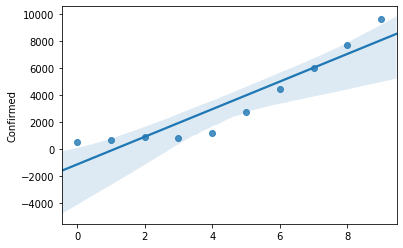

In [0]:
sns.regplot(np.arange(0,10,1),Chinese['Confirmed'],data=Chinese)

In [0]:
import statsmodels.api as sm

In [0]:
from sklearn.svm import SVR

In [0]:
model=SVR(kernel='linear',C=0.5)
model.fit(x.values,y.values)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
svc=SVC()
pf=PolynomialFeatures(degree=3,include_bias=True)
x_poly=pf.fit_transform(x.values)
svc.fit(x_poly, y.values)
y_poly_pred = svc.predict(x_poly)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [0]:
res

array([ 499.9666 ,  670.77313,  784.50525,  670.77313,  980.88434,
       2319.6394 , 3888.8464 , 5365.3    , 6962.0835 , 7006.502  ],
      dtype=float32)

Slight errors in prediction yet to be improved

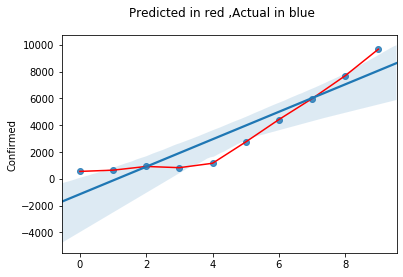

In [0]:
plt.suptitle("Predicted in red ,Actual in blue ")
lines=plt.plot(np.arange(0,10,1),res,c="red")
sns.regplot(np.arange(0,10,1),Chinese['Confirmed'],data=Chinese)


In [0]:
y.values

In [0]:
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

In [0]:
data

No correlation between variables ,thus more feature engineering is required

In [0]:
sns.heatmap(data.corr())

# Features
- Who Reports
- Seafood wholesale market
- Population Density
- Stock Market Price
- Geographical Conditions
- Visits to Outbreak zone
- Wild Animals in China
- Base Reproduction Rate
- Incubation Period 
- Medical Personal Deployed
- Realtime Social Media Sentiment
- Analyis of flights
- Analysis of wuhan metro data
- Highway Traffic using Google Sattelite API
- Attendance in Schools
- Medical/Army Personal Deployement
# Note: Subject to change
# *Investigating the possibility of Transfer Learning for prediction.


In [0]:
!pip install prophet

  Created wheel for prophet: filename=prophet-0.1.1-cp36-none-any.whl size=12168 sha256=f4a4ed8d375e2c67e05662c6049b433d46ff378f5610d0f8e9056993daa12c01
  Stored in directory: /root/.cache/pip/wheels/77/3e/f3/1c536bf1f871f818686e7fbf31cab18d52787a72dea8640756
Successfully built prophet


In [0]:
from fbprophet import Prophet


In [0]:
Chinese.columns=['ds','y','Deaths','Recovered']

In [0]:
chinese=Chinese.drop(columns=['Recovered','Deaths'])

In [0]:
m = Prophet()
m.fit(chinese)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


In [0]:
future = m.make_future_dataframe(periods=7,include_history=True)
future.tail()

,ds
12,2020-02-02 21:30:00
13,2020-02-03 21:30:00
14,2020-02-04 21:30:00
15,2020-02-05 21:30:00
16,2020-02-06 21:30:00


In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
12,2020-02-02 21:30:00,11388.767903,10358.962954,12466.034543
13,2020-02-03 21:30:00,12299.577751,11217.323964,13261.040391
14,2020-02-04 21:30:00,13210.387601,12194.150419,14266.787489
15,2020-02-05 21:30:00,14121.197450,13137.950937,15041.554091
16,2020-02-06 21:30:00,15032.007300,13956.748674,16023.241639


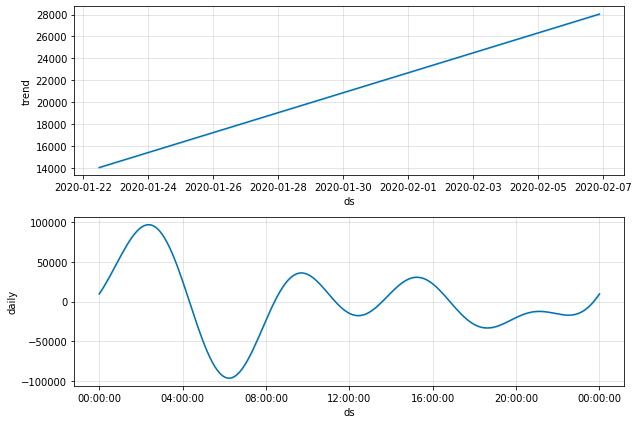

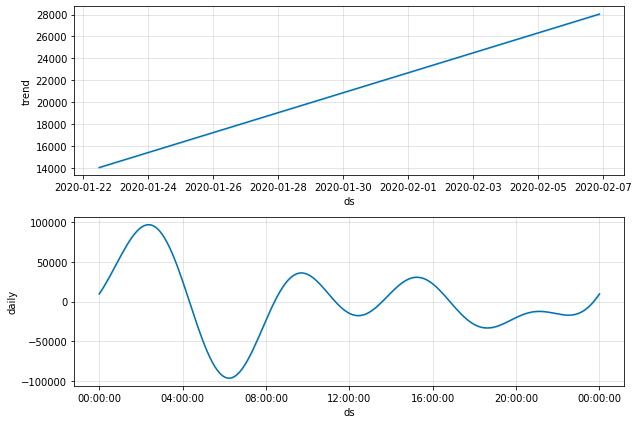

In [0]:
m.plot_components(forecast)

In [0]:
res=m.predict(future)

In [0]:
res

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22 12:00:00,14016.811098,-1578.695342,376.259980,14016.811098,14016.811098,-14649.227535,-14649.227535,-14649.227535,-14649.227535,-14649.227535,-14649.227535,0.0,0.0,0.0,-632.416436
1,2020-01-23 12:00:00,14927.620666,-759.016567,1233.277838,14927.620666,14927.620666,-14649.227534,-14649.227534,-14649.227534,-14649.227534,-14649.227534,-14649.227534,0.0,0.0,0.0,278.393133
2,2020-01-24 12:00:00,15838.430235,212.288027,2282.089339,15838.430235,15838.430235,-14649.227534,-14649.227534,-14649.227534,-14649.227534,-14649.227534,-14649.227534,0.0,0.0,0.0,1189.202701
3,2020-01-25 12:00:00,16749.239804,1091.746470,3052.901176,16749.239804,16749.239804,-14649.227534,-14649.227534,-14649.227534,-14649.227534,-14649.227534,-14649.227534,0.0,0.0,0.0,2100.012271
4,2020-01-25 22:00:00,17128.743909,698.413147,2703.725442,17128.743909,17128.743909,-15440.539965,-15440.539965,-15440.539965,-15440.539965,-15440.539965,-15440.539965,0.0,0.0,0.0,1688.203943
5,2020-01-26 23:00:00,18077.504169,2501.485119,4446.280129,18077.504169,18077.504169,-14661.589542,-14661.589542,-14661.589542,-14661.589542,-14661.589542,-14661.589542,0.0,0.0,0.0,3415.914627
6,2020-01-27 20:30:00,18893.437993,3213.056281,5215.110020,18893.437993,18893.437993,-14685.302830,-14685.302830,-14685.302830,-14685.302830,-14685.302830,-14685.302830,0.0,0.0,0.0,4208.135163
7,2020-01-28 23:00:00,19899.123869,4235.275071,6220.373795,19899.123869,19899.123869,-14661.589542,-14661.589542,-14661.589542,-14661.589542,-14661.589542,-14661.589542,0.0,0.0,0.0,5237.534327
8,2020-01-29 21:00:00,20734.032898,7390.092176,9459.262255,20734.032898,20734.032898,-12294.903747,-12294.903747,-12294.903747,-12294.903747,-12294.903747,-12294.903747,0.0,0.0,0.0,8439.129150
9,2020-01-30 21:30:00,21663.817952,7640.869616,9610.126680,21663.817952,21663.817952,-13007.479598,-13007.479598,-13007.479598,-13007.479598,-13007.479598,-13007.479598,0.0,0.0,0.0,8656.338354


In [0]:
res.iloc[10]

ds                            2020-01-31 21:30:00
trend                                     22574.6
yhat_lower                                8641.42
yhat_upper                                10557.7
trend_lower                               22574.6
trend_upper                               22574.6
additive_terms                           -13007.5
additive_terms_lower                     -13007.5
additive_terms_upper                     -13007.5
daily                                    -13007.5
daily_lower                              -13007.5
daily_upper                              -13007.5
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                      9567.15
Name: 10, dtype: object

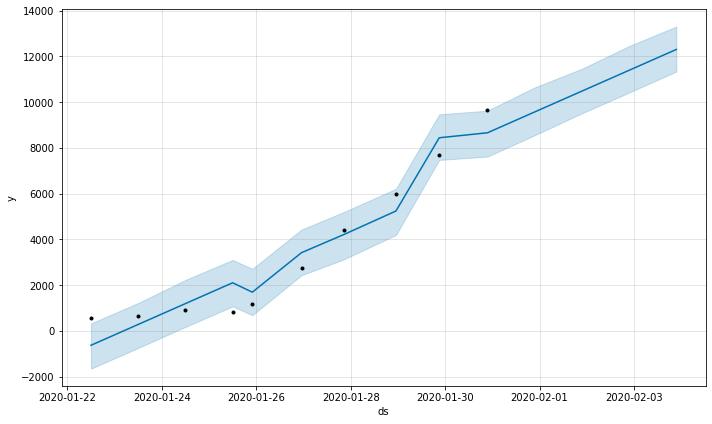

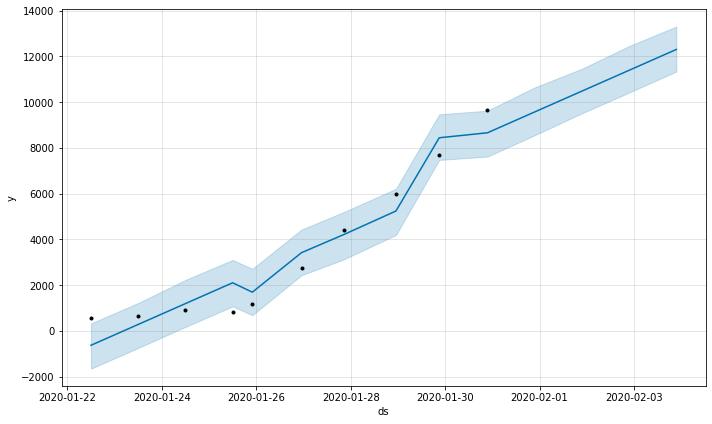

In [0]:
m.plot(res)

# CLEANED NEW PART

In [0]:
data=pd.read_csv("/content/china.csv")

In [0]:
data.columns=['DROPPER','Provinces','Country','Last Update'	,'Confirmed'	,'Deaths'	,'Recovered']

In [0]:
data=data.drop(columns=['DROPPER','Provinces','Country','Deaths','Recovered'])

In [0]:
data.columns=['ds','y']

In [0]:
from fbprophet import Prophet
m = Prophet()
m.fit(naan)
future = m.make_future_dataframe(periods=2,freq='d')
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
401,2020-01-30 21:30:00,284.669331,-247.332107,817.933405
402,2020-01-30 21:30:00,284.669331,-262.057132,828.740476
403,2020-01-30 21:30:00,284.669331,-279.703899,834.699035
404,2020-01-31 21:30:00,291.022828,-236.213101,840.514340
405,2020-02-01 21:30:00,297.376325,-251.902110,797.270394


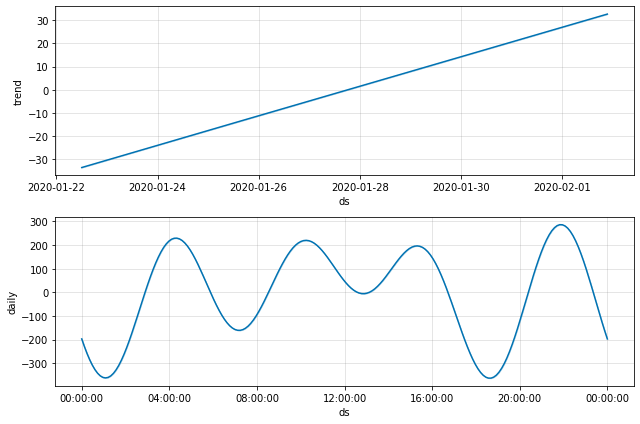

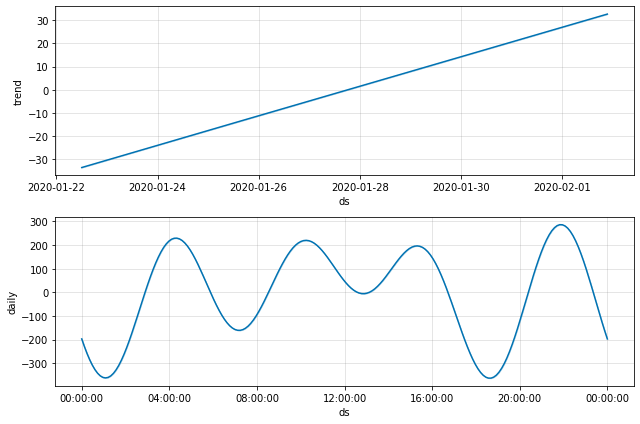

In [0]:
m.plot_components(forecast)

In [0]:
res=m.predict(future)

In [0]:
res.groupby('ds')['yhat'].sum().reset_index()

,ds,yhat
0,2020-01-22 12:00:00,473.242707
1,2020-01-23 12:00:00,670.160790
2,2020-01-24 12:00:00,854.300973
3,2020-01-25 12:00:00,925.411913
4,2020-01-25 22:00:00,545.427501
5,2020-01-26 23:00:00,3312.286877
6,2020-01-27 20:30:00,3636.721631
7,2020-01-28 23:00:00,6043.230856
8,2020-01-29 21:00:00,10489.585840
9,2020-01-30 21:30:00,8255.410605


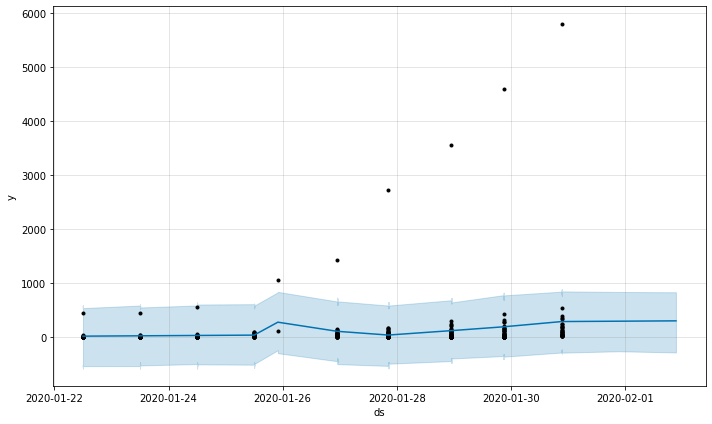

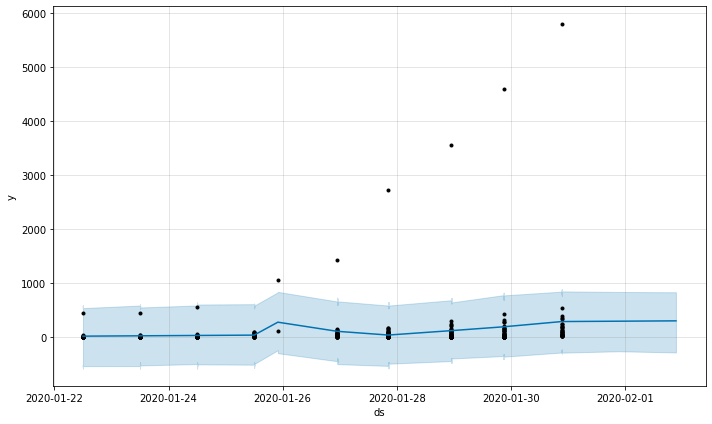

In [0]:
m.plot(res)